In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
heart_dataset = pd.read_csv('C:/Users/muxxa/OneDrive/Desktop/Machine Learning Project/heart.csv')

In [38]:
heart_dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
974,58,M,NAP,122,0,0,Normal,98,N,0.0,Flat,0
975,66,F,ASY,202,0,0,Normal,141,Y,1.0,Flat,1
976,63,M,ASY,152,0,0,Normal,118,Y,2.0,Flat,1
977,70,M,ASY,137,0,0,ST,121,Y,0.0,Up,1


In [39]:
heart_dataset.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
974   58   M           NAP        122            0          0     Normal   
975   66   F           ASY        202            0          0     Normal   
976   63   M           ASY        152            0          0     Normal   
977   70   M           ASY        137            0          0         ST   
978   59   M           ASY        142            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [40]:
categorical_cols= heart_dataset.select_dtypes(include=['object'])
categorical_cols.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [41]:
for cols in categorical_cols.columns:
    print(cols,'-', len(categorical_cols[cols].unique()),'Labels')

Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels


In [42]:
train, test = train_test_split(heart_dataset,test_size=0.3,random_state= 0)
labels = [x for x in train.ChestPainType.value_counts().index]
values = train.ChestPainType.value_counts()

In [43]:
train['Sex'] = np.where(train['Sex'] == "M", 0, 1)
train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
test['Sex'] = np.where(test['Sex'] == "M", 0, 1)
test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)
train=pd.get_dummies(train)
test=pd.get_dummies(test)
train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
886,52,0,138,223,0,169,0,0.0,0,0,0,1,0,0,1,0,0,0,1
380,60,0,160,0,0,99,1,0.5,1,1,0,0,0,0,0,1,0,1,0
443,60,0,130,186,1,140,1,0.5,1,1,0,0,0,0,0,1,0,1,0
285,51,1,110,190,0,120,0,0.0,0,0,0,1,0,0,1,0,0,0,1
71,44,0,130,215,0,135,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [44]:
x_train=train.drop(['HeartDisease'],1)
x_test=test.drop(['HeartDisease'],1)
y_train=train['HeartDisease']
y_test=test['HeartDisease']
print(x_train.shape)
print(x_test.shape)

(685, 18)
(294, 18)


C:\Users\muxxa\AppData\Local\Temp\ipykernel_1608\4251996618.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=train.drop(['HeartDisease'],1)
C:\Users\muxxa\AppData\Local\Temp\ipykernel_1608\4251996618.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=test.drop(['HeartDisease'],1)


In [45]:
print('-----------------------------------------------------------------------------------------------------------------------')
print('--------------------------------------------LOGISTIC REGRESSION--------------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------------------
--------------------------------------------LOGISTIC REGRESSION--------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------


In [46]:
lr = LogisticRegression(max_iter=10000)
model1=lr.fit(x_train, y_train)
print("Train accuracy:",model1.score(x_train, y_train))
print("Test accuracy:",model1.score(x_test,y_test))

Train accuracy: 0.8759124087591241
Test accuracy: 0.8639455782312925


In [47]:
lrpred = lr.predict(x_test)
print(classification_report(lrpred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       117
           1       0.91      0.86      0.88       177

    accuracy                           0.86       294
   macro avg       0.86      0.87      0.86       294
weighted avg       0.87      0.86      0.86       294



In [48]:
confusion_matrix(y_test, lrpred)

array([[102,  25],
       [ 15, 152]], dtype=int64)

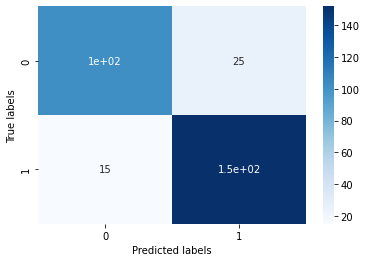

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, lrpred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [50]:
print('-----------------------------------------------------------------------------------------------------------------------')
print('--------------------------------------------SUPPORT VECTOR MACHINE-----------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------------------
--------------------------------------------SUPPORT VECTOR MACHINE-----------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------


In [51]:
from sklearn.svm import SVC
svm = SVC()
model2 = svm.fit(x_train, y_train)
print("Train accuracy:", model2.score(x_train, y_train))
print("Test accuracy:", model2.score(x_test, y_test))

Train accuracy: 0.7328467153284671
Test accuracy: 0.7278911564625851


In [52]:
svmpred = svm.predict(x_test)
print(classification_report(svmpred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       117
           1       0.79      0.75      0.77       177

    accuracy                           0.73       294
   macro avg       0.72      0.72      0.72       294
weighted avg       0.73      0.73      0.73       294



In [53]:
confusion_matrix(y_test, svmpred)

array([[ 82,  45],
       [ 35, 132]], dtype=int64)

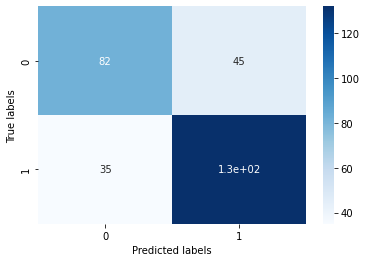

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, svmpred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [55]:
print('-----------------------------------------------------------------------------------------------------------------------')
print('--------------------------------------------DECISION TREE--------------------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------------------
--------------------------------------------DECISION TREE--------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------


In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model4 = dt.fit(x_train, y_train)
print("Train accuracy:", model4.score(x_train, y_train))
print("Test accuracy:", model4.score(x_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.7857142857142857


In [57]:
dtpred = dt.predict(x_test)
print(classification_report(dtpred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       126
           1       0.81      0.81      0.81       168

    accuracy                           0.79       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



In [58]:
confusion_matrix(y_test, dtpred)

array([[ 95,  32],
       [ 31, 136]], dtype=int64)

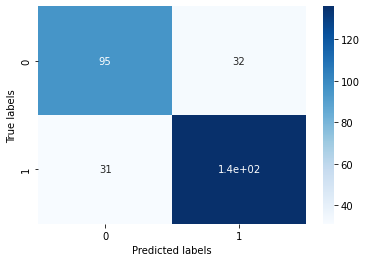

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, dtpred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [60]:
print('-----------------------------------------------------------------------------------------------------------------------')
print('--------------------------------------------RANDOM FOREST--------------------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------------------
--------------------------------------------RANDOM FOREST--------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------


In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model3 = rf.fit(x_train, y_train)
print("Train accuracy:", model3.score(x_train, y_train))
print("Test accuracy:", model3.score(x_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8537414965986394


In [62]:
rfpred = rf.predict(x_test)
print(classification_report(rfpred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       114
           1       0.91      0.84      0.88       180

    accuracy                           0.85       294
   macro avg       0.84      0.86      0.85       294
weighted avg       0.86      0.85      0.85       294



In [63]:
confusion_matrix(y_test, rfpred)

array([[ 99,  28],
       [ 15, 152]], dtype=int64)

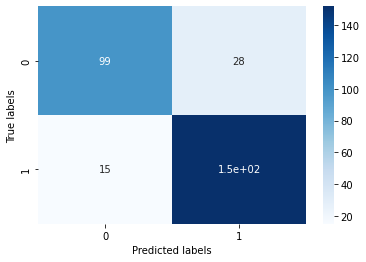

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, rfpred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()